<a href="https://colab.research.google.com/github/mukami42/mukami42/blob/main/student_prediction_cat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
file_path = '/content/Student performance.csv'
sharon = pd.read_csv(file_path)

# Check missing values  0 means no missing value
missing_values = sharon.isnull().sum()
print(missing_values)

# Check  duplicatation of rows
duplicate_rows = sharon.duplicated().sum()
print(duplicate_rows)

# convert categorical variables into numeric format.
sharon_encoded = pd.get_dummies(sharon, drop_first=True)

#  the feature  and  target column
X = sharon_encoded.drop('Target_Graduate', axis=1)  # This is aFeatures
y = sharon_encoded['Target_Graduate']  # this is a Target

# Split to tain and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize by scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Verify  splits shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Initialize the models with increased  for Logistic Regression
logistic_regression = LogisticRegression(random_state=42, max_iter=2000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train the models
logistic_regression.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_regression.predict(X_test_scaled)
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Evaluate Decision Tree
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Evaluate Random Forest
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'Marital status'),
  Text(1, 0, 'Application mode'),
  Text(2, 0, 'Application order'),
  Text(3, 0, 'Course'),
  Text(4, 0, 'Daytime/evening attendance\t'),
  Text(5, 0, 'Previous qualification'),
  Text(6, 0, 'Previous qualification (grade)'),
  Text(7, 0, 'Nacionality'),
  Text(8, 0, "Mother's qualification"),
  Text(9, 0, "Father's qualification"),
  Text(10, 0, "Mother's occupation"),
  Text(11, 0, "Father's occupation"),
  Text(12, 0, 'Admission grade'),
  Text(13, 0, 'Displaced'),
  Text(14, 0, 'Educational special needs'),
  Text(15, 0, 'Debtor'),
  Text(16, 0, 'Tuition fees up to date'),
  Text(17, 0, 'Gender'),
  Text(18, 0, 'Scholarship holder'),
  Text(19, 0, 'Age at enrollment'),
  Text(20, 0, 'International'),
  Text(21, 0, 'Curricular units 1st sem 

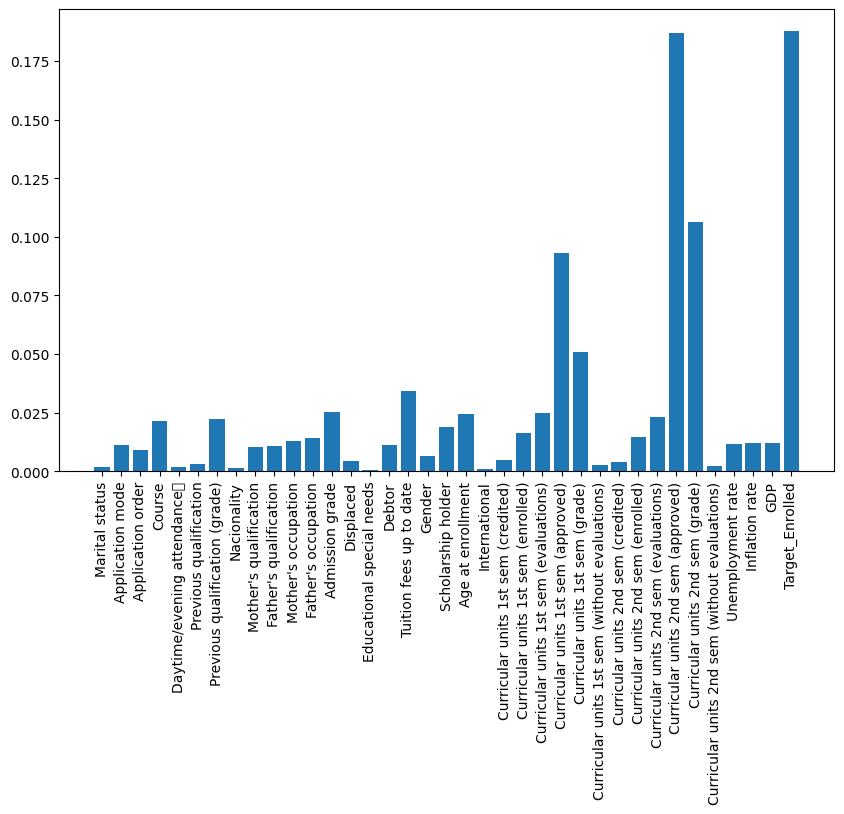

In [33]:
# Plot feature importance for Random Forest
feature_importances = random_forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)